In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor 

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv("train.csv")
# Print the shape (rows, columns) of the DataFrame
print(df.shape)
# Display a random sample of three rows from the DataFrame
df.sample(3)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
797,798,20,RL,57.0,7677,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,110000
1303,1304,20,RL,73.0,8688,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,232000
922,923,20,RL,65.0,10237,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,169990


## Cleaning

In [3]:
# Drop specific columns from the DataFrame
df = df.drop(columns=["Alley", "MasVnrType", "FireplaceQu", "PoolQC", "Fence", "MiscFeature", "Id"])

# Drop duplicated rows from the DataFrame
df = df.drop_duplicates()

# Identify columns with null (missing) values
columns_with_nulls = df.columns[df.isnull().any()]
columns_with_nulls_list = list(columns_with_nulls)
columns_with_nulls_list

['LotFrontage',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

## LabelEncoder

In [4]:
object_data = df.select_dtypes(include="object")
int_data = df.select_dtypes(exclude="object")
enc = LabelEncoder()

# Encode categorical columns using LabelEncoder
for i in range(0, object_data.shape[1]):
    object_data.iloc[:, i] = enc.fit_transform(object_data.iloc[:, i])

# Concatenate numerical and encoded categorical data
df = pd.concat([int_data, object_data], axis=1)


In [5]:
# Number of missing (null) values in each column of the DataFrame
df.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
                ... 
GarageQual         0
GarageCond         0
PavedDrive         0
SaleType           0
SaleCondition      0
Length: 74, dtype: int64

In [6]:
# Loop through columns with null values
for column_name in columns_with_nulls_list:
    # Fill missing values with the mean of the respective column
    df[column_name].fillna(value=df[column_name].mean(), inplace=True)

# Check for missing values after imputation
null_col = df.isnull().sum()


In [7]:
# Print the shape (rows, columns) of the DataFrame
print(df.shape)

(1460, 74)


## Distribution

In [8]:
# Create a pair plot using Seaborn
sns.pairplot(df)
# Display the plot
plt.show()

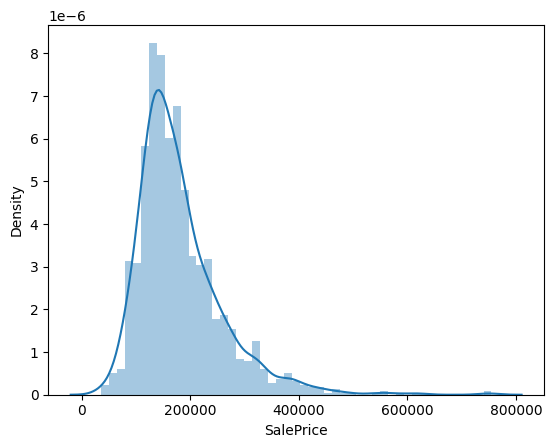

In [9]:
#histogram
sns.distplot(df['SalePrice']);
plt.show()


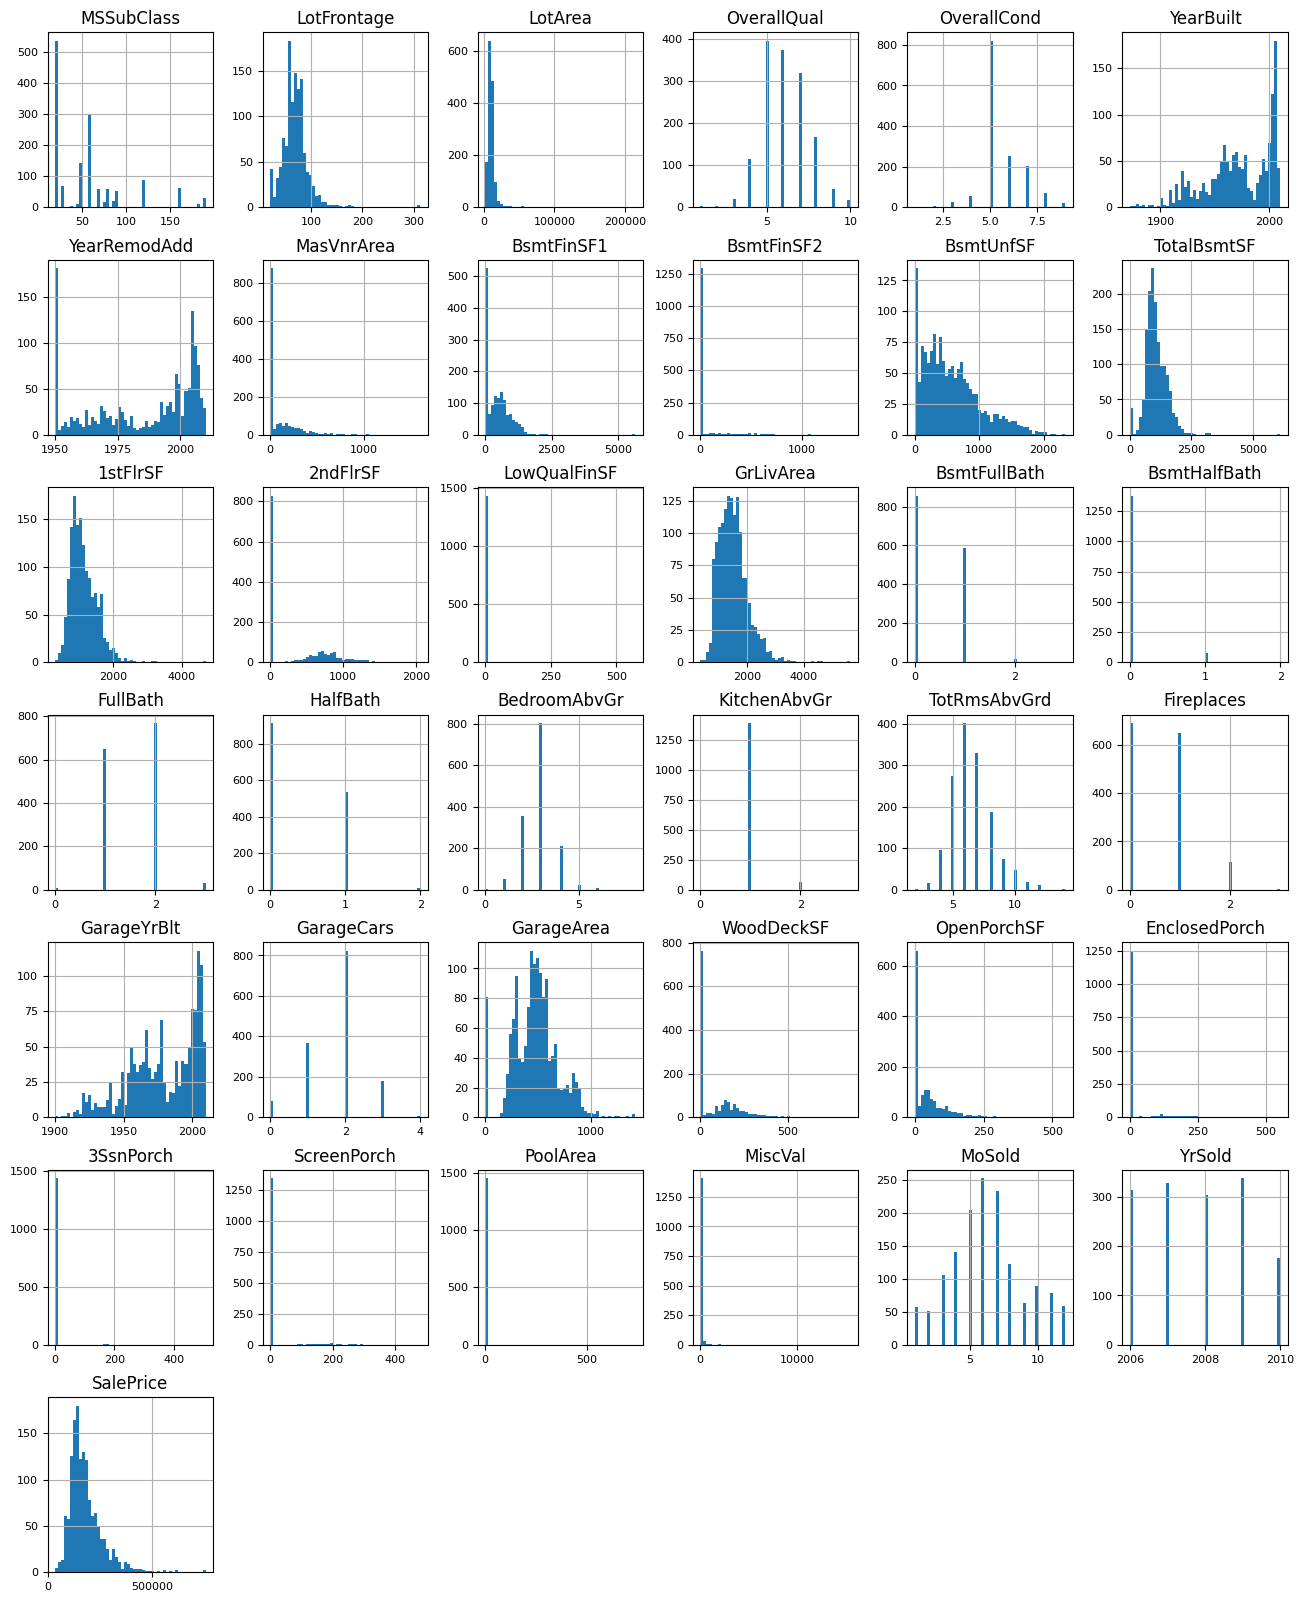

In [10]:
# Create histograms for numerical columns in int_data
int_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

# Display the histograms
plt.show()


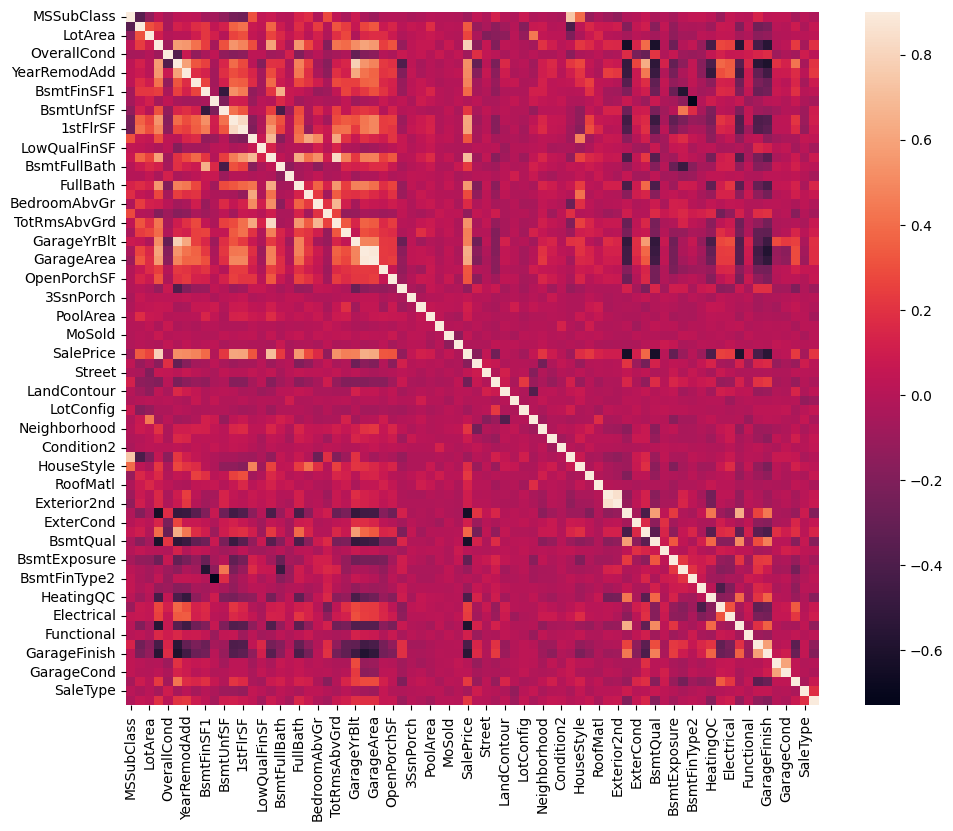

In [11]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=True);

## Models

In [12]:
# Drop the "SalePrice" column to get features (X) and keep "SalePrice" as target (y)
x = df.drop(columns="SalePrice")
y = df["SalePrice"]

# Split the dataset into training and testing sets
# train_size=.83 means 83% of the data will be used for training
# random_state=42 sets the random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.83, random_state=42)

In [13]:
# Create a dictionary with model names as keys and model instances as values
model_list = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(max_depth=10),
    "RandomForestRegressor": RandomForestRegressor(max_depth=10),
    "MLPRegressor": MLPRegressor(hidden_layer_sizes=[64, 150, 32], max_iter=1500)
}

# Iterate through the models and evaluate their performance
for model_name, model_instance in model_list.items():
    # Train the model
    model_instance.fit(X_train, y_train)
    
    # Calculate scores on training and testing data
    score_train = model_instance.score(X_train, y_train)
    score_test = model_instance.score(X_test, y_test)

    # Print the scores
    print("Model {}, Train Score: {:.4f}, Test Score: {:.4f}".format(model_name, score_train, score_test))


Model LinearRegression, Train Score: 0.8451, Test Score: 0.8514
Model DecisionTreeRegressor, Train Score: 0.9874, Test Score: 0.7578
Model RandomForestRegressor, Train Score: 0.9766, Test Score: 0.8883
Model MLPRegressor, Train Score: 0.6698, Test Score: 0.7819
